Ce Note Book a pour objectif d'apprendre et de tester les differents algorithmes d'apprentissage supervisé présent dans le module sklearn.

# Apprentissage supervisé

L'apprentissage supervisé est un domaine du machine learning qui consiste à entrainer un modèle de prédiction à partir de données déjà classées. Le modèle possède donc déjà des exemples sur lesquels se baser pour essayer de prédire l'information demandé selon les features de nouveaux échantillons qu'on pourrait lui donner.

Ce domaine du machine learning se sépare en deux sous-categories, les modèles de classification et les modèles de régression.

## Modèles de classification

Tout d'abord, comme vu dans le projet de classification des fleurs d'Iris, les projets d'apprentissage supervisé peuvent prendre la forme de tâches de classification ou l'on doit trouver la classe d'un échantillon grâce à ses features. Cette tâche peut être exécuter dans un problème de classification binaire, donc une classification entre 2 classes, ou à choix multiples, comme le problème des fleurs d'Iris.

Pour les tests présentés dans ce notebook, le dataset intégré à sklearn sur les cancer du sein, le breast cancer dataset sera utilisé.

## Modèles de régression

Ensuite, les problèmes d'apprentissage supervisé peuvent prendre la forme de problèmes de régression, ou le but est de trouver une correlation entre les features pour trouver une équation permettant la prediction de valeurs nouvelles, une fonction en mathematiques.

Le dataset comportant le prix des habitations de la région de Boston dans les années 1970, soit le boston housing dataset, sera utilisé pour nos tests.

In [79]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.datasets import make_moons, make_blobs, make_circles

from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import numpy as np
import graphviz
import mglearn

Avant de commencer à tester les algorithmes, il faut charger les datasets des tumeurs cancereuses et des coûts des maisons de boston dans les années 70.

Il est possible d'afficher une description brève des datasets pour mieux comprendre de quoi ils sont constitués.

In [2]:
cancer = load_breast_cancer()
boston = load_boston()

print(cancer['DESCR'][:780] + "\n")
print(boston['DESCR'][:1230])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

  

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value 

Ensuite, il faut definir une fonction pour élargir un dataset, permettant d'inclure les interactions entre les features du dataset (le produit de 2 features). Une technique comme celle-ci s'appelle du feature engineering.

In [3]:
def make_interactions(X):
    X_ex = []
    for sample in X:
        sample_ex = sample
        for i in range(sample.size):
            for j in range(i, sample.size):
                sample_ex = np.append(sample_ex, sample[i]*sample[j])
        X_ex.append(sample_ex)
    return np.array(X_ex)

# K Nearest Neighbors

Le KNN est consideré par plusieurs comme l'algorithme de machine learning le plus simple de tous. Comme son nom l'indique, le KNN utilise la proximité de k points autours de celui dont on veut prédire la classe.

Paramètre:
- K: le paramètre alpha permet de controler le nombre de points du dataset qui seront utilisés pour prédire la classe ou la valeur d'un nouveau point. Les points utilisés étant les K points les plus proches du nouveau.

Ce premier test avec le KNN démontre la relation existante entre la complexité d'un modèle et sa précision. Dans le cas du KNN, la complexité est inversement proportionnelle au paramètre K. Comme il est visible sur le gaphique suivant, un modèle trop complexe ne va pas avoir la meilleure performance puisqu'il va trop se fier au training set pour prédire, l'empêchant de généraliser. À l'opposé, un modèle trop simple généralisera trop et les predictions faites seront vagues.

Il est donc nécessaire de jouer avec les paramètres d'un modèle pour ajuster sa complexité et potentiellement ameliorer la capacité du modèle à généraliser.

## Classification

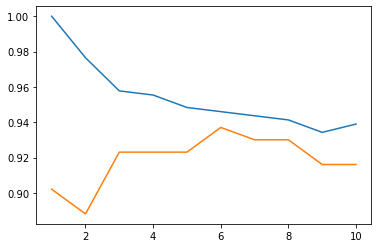

In [4]:
# Ces listes vont nous permettrent par la suite de visualiser l'evolution de la precision des modeles par rapport a leur
# complexite pour les classificateurs.
training_accuracy_clf = []
test_accuracy_clf = []

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # un construit le modele
    clf.fit(X_train, y_train) # on l'entraine
    training_accuracy_clf.append(clf.score(X_train, y_train)) # on ajoute la precision selon le train_set a la liste
    test_accuracy_clf.append(clf.score(X_test, y_test)) # on ajoute la precision selon le test_set a la liste

plt.plot(neighbors_settings, training_accuracy_clf)
plt.plot(neighbors_settings, test_accuracy_clf)

## Régression

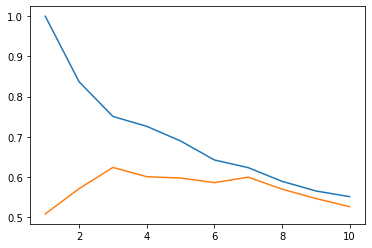

In [5]:
# Ces listes vont nous permettrent par la suite de visualiser l'evolution de la precision des modeles par rapport a leur
# complexite pour les classificateurs.
training_accuracy_reg = []
test_accuracy_reg = []

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=66)

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # un construit le modele
    reg.fit(X_train, y_train) # on l'entraine
    training_accuracy_reg.append(reg.score(X_train, y_train)) # on ajoute la precision selon le train_set a la liste
    test_accuracy_reg.append(reg.score(X_test, y_test)) # on ajoute la precision selon le test_set a la liste
    
plt.plot(neighbors_settings, training_accuracy_reg)
plt.plot(neighbors_settings, test_accuracy_reg)

Pros:
    - Modèle très simple à comprendre et instinctif.
    - L'entrainement ne consiste qu'à enregistrer le dataset et est donc très rapide.
    
Cons:
    - La prédiction d'un nouvel échantillon peut être très lent.
    - Ne généralise pas bien avec des datasets possédant beaucoup de features.
    - La vitesse de prédiction est inversement proportionnelle à la quantité d'échantillons du dataset.

# Modèles Linéaires

Les modèles linéaires se bases sur les concepts de l'algèbre linéaire pour trouver une équation linéaire regroupant les différents features d'un dataset, chacun possédant un coefficient propre. Le nom provient du fait que la forme de l'équation résultante (sous la forme ax + by + cz + ...) est une équation linéaire.

## Régression

Tout d'abord, il est essentiel de separer les echantillons, samples, d'un dataset en ensembles d'entrainement, le training set, et en ensemble de test, le test set. Cela permet d'un bord d'entrainer le modele, et de l'autre de mesurer la precision du modele avec des donnees jamais vues par le modele, pour savoir s'il generalise correctement (reutiliser le training set serait absurde puisque le modele pourrait simplement enregistrer le set et ressortir ces points que cela nous donnerait une precision de 100%, alors qu'il ne pourrait absolument pas generaliser).

In [6]:
# Separation du dataset du boston housing pour les tests des algorithmes de regression
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

X_train_ex = make_interactions(X_train)
X_test_ex = make_interactions(X_test)

print(X_train_ex.shape)
print(X_test_ex.shape)

(379, 104)
(127, 104)


### Régression Linéaire

La régression linéaire est l'algorithme le plus simple parmi les modèles linéaire.

Il apprend le poid pour chaque feature permettant de former une equation linéaire sans se limiter (garder les w le plus proche de 0 par exemple). Cela rend l'algorithme plus simple à comprendre et plus rapide à entrainer mais il y a beaucoup de risques que le modèle overfit, puisque les poids sont optimisés pour le training set sans se soucier de sa capacité à généraliser.

La précision du modèle sur l'entrainement est beaucoup plus haute que la précision sur le test. les risques d'overfitting sont donc très grands.

Il n'y a pas de paramètre à prendre en compte lorsqu'on construit ce modèle.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

#entrainement et affichage de la precision pour le dataset simple
reg_lin = LinearRegression().fit(X_train, y_train)

training_accuracy = reg_lin.score(X_train, y_train)
test_accuracy = reg_lin.score(X_test, y_test)

print("Training accuracy: %s" % training_accuracy)
print("Test accuracy: %s" % test_accuracy)

#entrainement et affichage de la precision pour le dataset avec interactions
reg_lin_ex = LinearRegression().fit(X_train_ex, y_train)

training_accuracy_ex = reg_lin_ex.score(X_train_ex, y_train)
test_accuracy_ex = reg_lin_ex.score(X_test_ex, y_test)

print("\nTraining accuracy extended: %s" % training_accuracy_ex)
print("Test accuracy extended: %s" % test_accuracy_ex)

Training accuracy: 0.7697699488741149
Test accuracy: 0.6354638433202129

Training accuracy extended: 0.9520519609032732
Test accuracy extended: 0.6074721959760395


### Ridge Regression

La régression par Ridge est presque identique à la régression lineaire, à l'exception que la régression par Ridge possède un paramètre permettant de contrôler la complexité du modèle.

Paramètre:
- alpha: L'alpha détermine le niveau de restriction que l'on va donner au modèle. Un alpha plus élevé entrainera un modèle plus simple et apte à généraliser, alors qu'un alpha faible va rapprocher le modèle de la régression linéaire.

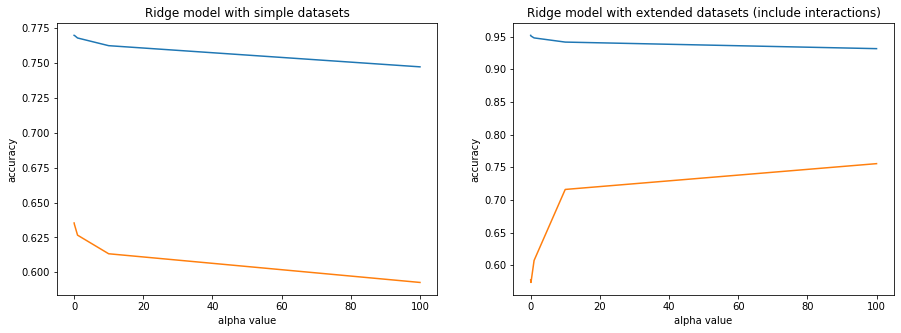

In [8]:
training_accuracy = []
test_accuracy = []

training_accuracy_ex = []
test_accuracy_ex = []

alpha_settings = [0.01, 0.1, 1, 10, 100]

for alpha in alpha_settings:
    #entrainement du dataset simple
    reg_rdg = Ridge(alpha=alpha).fit(X_train, y_train)
    training_accuracy.append(reg_rdg.score(X_train, y_train))
    test_accuracy.append(reg_rdg.score(X_test, y_test))
    
    #entrainement du dataset augmente
    reg_rdg_ex = Ridge(alpha=alpha).fit(X_train_ex, y_train)
    training_accuracy_ex.append(reg_rdg_ex.score(X_train_ex, y_train))
    test_accuracy_ex.append(reg_rdg_ex.score(X_test_ex, y_test))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))   

ax[0].set_title("Ridge model with simple datasets")
ax[0].set_xlabel("alpha value")
ax[0].set_ylabel("accuracy")
ax[0].plot(alpha_settings, training_accuracy)
ax[0].plot(alpha_settings, test_accuracy)

ax[1].set_title("Ridge model with extended datasets (include interactions)")
ax[1].set_xlabel("alpha value")
ax[1].set_ylabel("accuracy")
ax[1].plot(alpha_settings, training_accuracy_ex)
ax[1].plot(alpha_settings, test_accuracy_ex)

### Lasso Regression

La différence entre Lasso et Ridge est que le lasso permet aux valeurs d'atteindre 0, alors que Ridge ne le permet pas, les valeurs vont se rapprocher de 0 sans jamais le devenir. Cela fait que la méthode lasso va mettre en valeur les features les plus significatives du dataset.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.6918383506793, tolerance: 3.233182126649077
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1390.2307980463295, tolerance: 3.233182126649077
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748.7609555118702, tolerance: 3.233182126649077
  positive)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

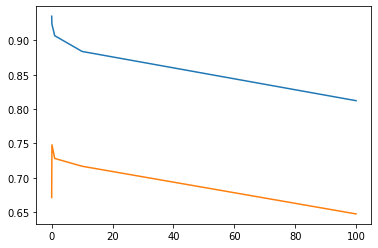

In [9]:
training_accuracy = []
test_accuracy = []

alpha_settings = [0.01, 0.1, 1, 10, 100]

for alpha in alpha_settings:
    #entrainement du dataset simple
    reg_las = Lasso(alpha=alpha).fit(X_train_ex, y_train)
    training_accuracy.append(reg_las.score(X_train_ex, y_train))
    test_accuracy.append(reg_las.score(X_test_ex, y_test))   

plt.plot(alpha_settings, training_accuracy)
plt.plot(alpha_settings, test_accuracy)

## Classification linéaire

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### Régression Logistique

Il ne faut pas se fier au nom, la régression logistique est belle et bien un algorithme de classification.

Paramètres
- C: indique le niveau de restriction que nous voulons donner au modèle. Un c élevé donne un modèle plus complexe, qui va donc être plus efficace sur le training set et moins bon en généralisation. Le C montre des differences à l`échelle logarithmique.
- penalty: Ce paramètre donne le type de restriction que l'algorithme va donner au modèle. Deux paramètres possibles et montrés ici sont les l1 et l2 penalty. le premier permet de réduire certains coefficients à 0, mettant en valeur les features les plus importantes du set, alors que l2 ne le permet pas, donnant des résultats plus généralisables, mais qui vont être moins compréhensible.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

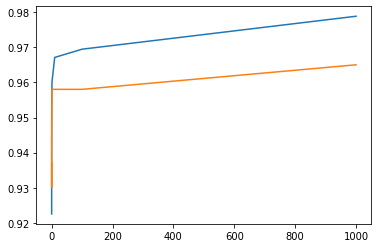

In [11]:
training_accuracy = []
test_accuracy = []
clf_log_l2 = []
clf_log_l1 = []

C_settings = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_settings:
    clf_log = LogisticRegression(C=C).fit(X_train, y_train)
    clf_log_l2.append(clf_log)
    clf_log_l1.append(LogisticRegression(C=C, penalty="l1").fit(X_train, y_train))
    
    training_accuracy.append(clf_log.score(X_train, y_train))
    test_accuracy.append(clf_log.score(X_test, y_test))

# affichage de la precision des modeles selon le parametre C (la penalty est l2 par defaut)
plt.plot(C_settings, training_accuracy)
plt.plot(C_settings, test_accuracy)

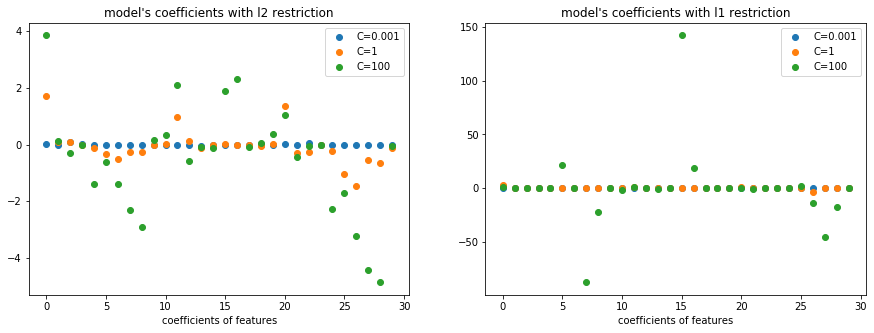

In [12]:
#affichage des coefficients du modele de regression logistique avec la restriction l1 et l2
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(clf_log_l2[0].coef_.T, 'o', label="C=0.001")
ax[0].plot(clf_log_l2[3].coef_.T, 'o', label="C=1")
ax[0].plot(clf_log_l2[5].coef_.T, 'o', label="C=100")
ax[0].set_xlabel("coefficients of features")
ax[0].set_title("model's coefficients with l2 restriction")
ax[0].legend()

ax[1].plot(clf_log_l1[0].coef_.T, 'o', label="C=0.001")
ax[1].plot(clf_log_l1[3].coef_.T, 'o', label="C=1")
ax[1].plot(clf_log_l1[5].coef_.T, 'o', label="C=100")
ax[1].set_xlabel("coefficients of features")
ax[1].set_title("model's coefficients with l1 restriction")
ax[1].legend()

### SVC (Support Vector Classifier)

Le SVC est un classificateur utilisant l'algorithme du SVM, soit le Support Vector Machine.

Le SVC, tout comme la régression logistique, peut être utilisé pour résoudre des problèmes de classification binaire tout comme des problèmes de classification multi-classes.

Paramètre
- C: Tout comme la regression logistique, le SVC prend un paramètre C qui permet de définir le niveau de restriction du modèle. Un C plus élevé va forcer le modèle à mieux s'ajuster au training set, généralement au prix d'une moins bonne capacité à généraliser, alors qu'un C plus bas va laisser plus de place à l'erreur dans le training set, laissant le modèle mieux généraliser.

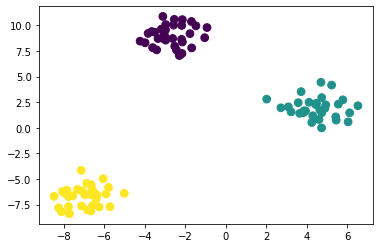

In [13]:
#generation d'une base de donnees multi-classes pour pouvoir tester les modeles
X, y = make_blobs(random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=60)

Apres avoir entrainé un modèle de SVC, on peut afficher les séparations des classes pour voir comment fonctionne le modèle. Les modèles de classification linéaire multi-classes vont utiliser la tactique du 1 vs le reste pour classifier. Cela veut dire que le modèle va apprendre à classifier binairement chaque classe des autres, et lorsque qu'on va donner un nouveau point au modèle, il va le classifier dans la classe avec la plus haute valeur, la valeur étant attribué grâce à la distance de la ligne de séparation binaire de ladite classe.

(-10, 8)

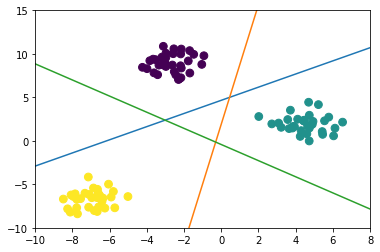

In [14]:
svc = LinearSVC().fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=60)
line = np.linspace(-15, 15)
for coef, intercept in zip(svc.coef_, svc.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)

Pros:
    - Rapides à entrainer et à prédire.
    - Performent efficacement avec des dataset plus volumineux.
    - Performent efficacement avec des dataset troués.
    - Algorithmes faciles à comprendre.
    
Cons:
    - N'est pas le meilleur algorithme pour les petits datasets.
    - Les coefficients ne laissent pas beaucoup de place à l'interprétation des résultats.

# Classificateurs Naive Bayes

Ce type de modèles d'apprentissage supervisé repose sur des statistiques pour prédire à quelle classe appartient un nouvel échantillon.

Sklearn possède trois types différents d'algorithmes bases sur le Naive Bayes:
- NB Gaussien: permet la classification de datasets avec des données réels
- NB Polynomial: permet la classification de datasets avec des données entières
- NB Bernoulli: permet la classification de datasets avec des données binaires

## NB Gaussien

Voici un exemple rapide d'utilisation du NB Gaussien avec le dataset du cancer.

In [15]:
gnb = GaussianNB().fit(X_train, y_train)
training_accuracy = gnb.score(X_train, y_train)
test_accuracy = gnb.score(X_test, y_test)

print("Training accuracy: %s" % training_accuracy)
print("Test accuracy: %s" % test_accuracy)

Training accuracy: 0.9507042253521126
Test accuracy: 0.9370629370629371


Pros:
    - Très efficaces sur les datasets composés de textes, comme la classification par thèmes et les spam philters.
    - Rapides à entrainer et à donner des prédictions.
    - Algorithmes facile à comprendre.
    - Efficace avec des datasets volumineux.
    - Encore plus rapide que les modèles linéaires

Cons:
    - Peu efficaces sur les petits datasets comparés à d'autres algorithmes.

# Arbres de décision

Les arbres de décisions vont diviser l'espace des features en 2 sections qui séparent le mieux possible le dataset. ils vont ensuite diviser ces sous-espaces en 2 autres sous-espaces chacuns pour à nouveau séparer le mieux possible les points du dataset restant dans chaque sous-espace. L'algorithme va répéter cela jusqu'à ce que chaque sous-espace créé ne possède des points d'une seule classe.

## Contrôle de la complexité

l'algorithme continuant à entrainer le modèle jusqu'à ce qu'il fit parfaitement le training set, ce type de modèle risque beaucoup d'overfit. C'est pourquoi il existe des méthodes permettant de limiter sa complexité:
    - Le pré-pruning: Ça consiste à donner des limites à la division de l'espace avant d'entrainer le modèle. Par exemple,
      donner un nombre maximum de sous-divisions que l'arbre peut posséder.
    - le post-pruning: Consiste à réduire la complexité du modèle après qu'il ait été entrainé. Par exemple, on pourrait
      enlever les branches les moins sugnificatives de l'arbre.
      
Scikit-learn ne possède pas de prossessus de post-pruning, alors les tests ne porterons que sur le pré-pruning.

In [16]:
#entrainement d'arbre de decision sans pre-pruning
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("accuracy on training set without pre-pruning: %s" % tree.score(X_train, y_train))
print("accuracy on test set without pre-pruning: %s" % tree.score(X_test, y_test))

accuracy on training set without pre-pruning: 1.0
accuracy on test set without pre-pruning: 0.9370629370629371


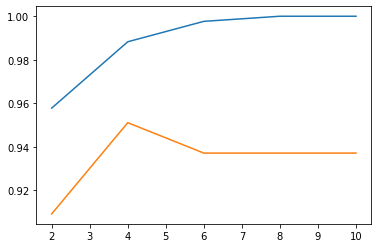

In [17]:
#Entrainement d'un arbre de decision avec limite de profondeur = 4
training_accuracy = []
test_accuracy = []

max_depth_settings = [2, 4, 6, 8, 10]

for max_depth in max_depth_settings:
    #entrainement du dataset simple
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))   

plt.plot(max_depth_settings, training_accuracy)
plt.plot(max_depth_settings, test_accuracy)

Pros:
    - Le pré et post-pruning permettent d'avoir un plus grand contrôle sur l'entrainement de notre modèle.
    - Le modèle obtenu est facilement compréhensible.
    - ne nécessite pas bcp de preprocessing pour fonctionner.
    - Contrairement aux autres modèles, l'arbre de décision fonctionne
      mieux sur les données avec des ordres de grandeurs différents.
Cons:
    - Même avec un bon pre-pruning, les arbres vont avoir tendance à
      overfitter.

# Forêt aléatoire

La forêt aléatoire est un ensemble de modèles. Celui-ci utilise donc un grand nombre d'arbres de décision, entraînés chacun avec des seeds légèrement différentes. Cela mène avec des arbres légèrements différents, qui vont tous overfitter dans leur domaine. le but de faire cela est de faire la moyenne des prédictions des arbres pour donner une prédiction qui va mieux généraliser.

In [18]:
#on commence par générer un dataset pour l'entrainement
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

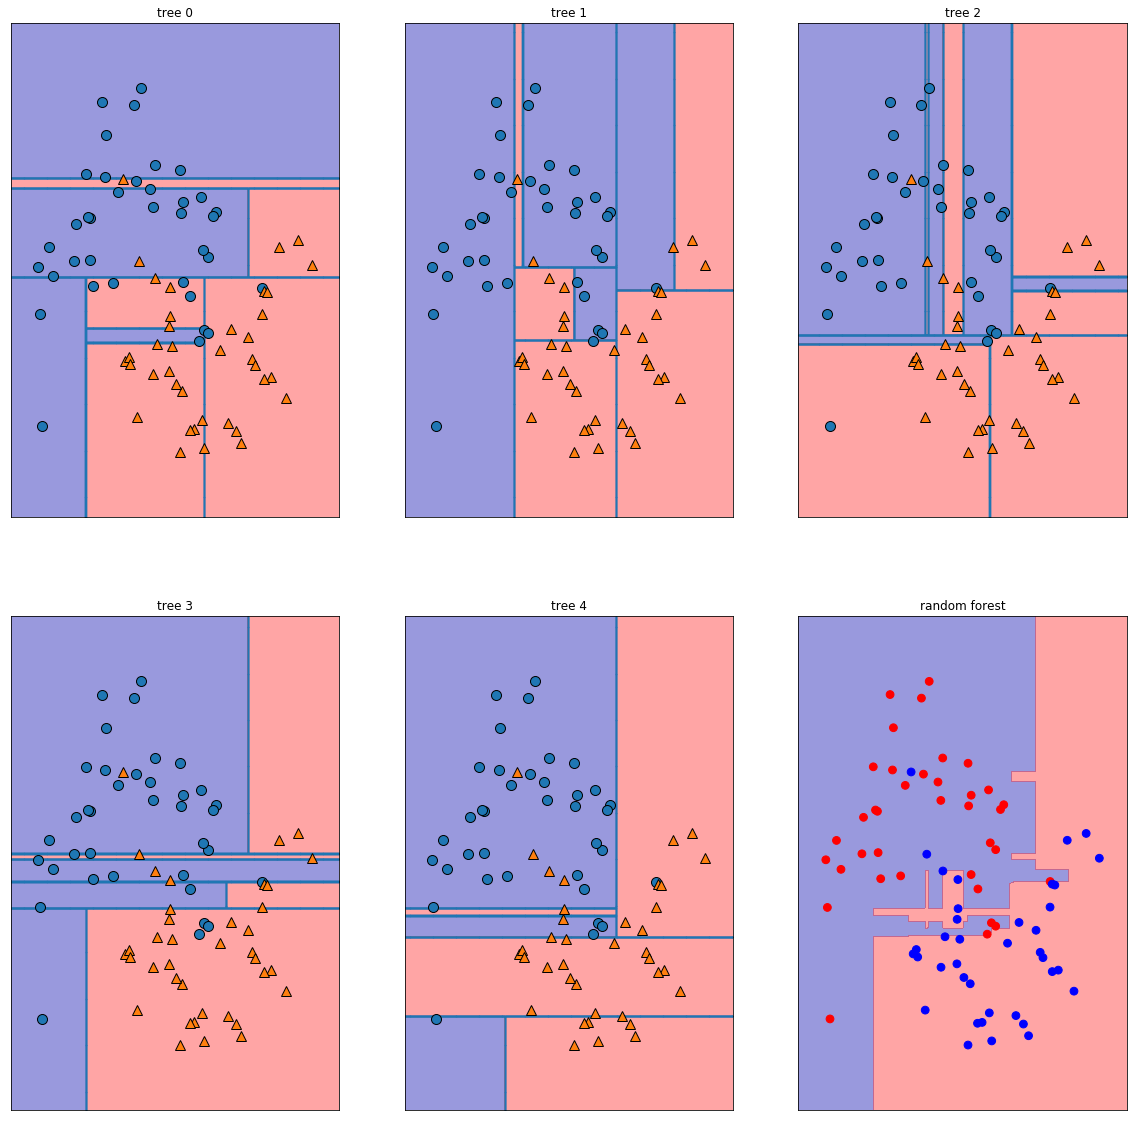

In [19]:
#affiche les decisions boundaries des arbres et le decision boudnary de la foret
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


Les forêts et arbres de décisions possèdes une liste d'attributs feature_importances. Celle-ci donne un coefficient à chaque feature selon l'importance de cette dernière dans la prise de décision du modèle.

([<matplotlib.axis.XTick at 0x27970cf5fd0>,
 <a list of 30 Text xticklabel objects>)

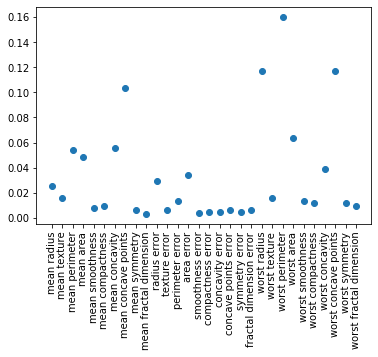

In [21]:
plt.plot(forest.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

Pros:
    - Un des modèle le plus utilisé en machine learning moderne.
    - Ne nécessite généralement pas beaucoup d'ajustements pour fonctionner correctement.
    - Possède les avantages des arbres de décision sans leurs désavantages.
Cons:
    - Le résultat n'est pas facile à interpréter.
    - Peut prendre du temps à entrainer sur de larges datasets (l'entrainement peut être paralléliser par contre)
    - Ne fonctionne pas si bien sur des datasets à haute dimensionalité ou éparpillé.

# Régression par Gradient Renforcé

Le RGR se base sur le même concept d'ensemble d'arbres de décision que la forêt aléatoire. Le dernier va, à la place de générer aléatoirement des arbres, le RGR se base sur un puissant pré-pruning. Plusieurs différents datasets sont généré à partir du dataset principal pour entrainer les différents arbres, qui seront des arbres larges avec de 2 à 5 niveaux de profondeur. Cela va donner des arbres bon dans leur dataset mais mauvais à généraliser qui, combinés, vont être capable de généraliser avec encore plus de précision que les forêts aléatoires puisque chaque arbre va exceller dans un domaine différent des autres.

paramètres:
    - learning_rate = permet de contrôler à quel point chaque arbre essais de fitter avec le training set.
    - max_depth = la profondeur maximal des arbres.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.972028


Contrairement à la forêt aléatoire, le RGR peut ignorer complètement certaines features du dataset.

([<matplotlib.axis.XTick at 0x27970da8390>,
 <a list of 30 Text xticklabel objects>)

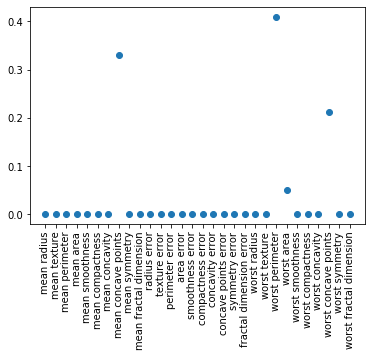

In [23]:
plt.plot(gbrt.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

Pros:
    - Un des modèles les plus puissants.
    - Ne nécessite pas de mettre les données à l'échelle.
Cons:
    - Nécessite un ajustement des paramètres méticuleux.
    - Peut prendre beaucoup de temps à entrainer.
    

# Kernelized SVM

paramètres:
    - C: Comme dans les modèles linéaires, le C indique le niveaude de restriction que l'on donne aux coefficients. un C plus
      élevé indique donc une plus faible restriction autour de 0.
    - gamma: Le gamma indique la quantite de points pris en compte lors du calcul des vecteurs de support

Text(0, 0.5, 'feature2')

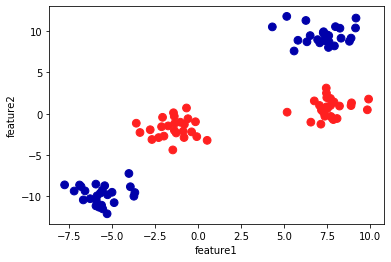

In [26]:
#formation d'un dataset genere
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
plt.xlabel("feature1")
plt.ylabel("feature2")

Ici, une 3e feature correspondant au carré de la feature #2 est ajoutée pour permettre l'utilisation d'un SVM linéaire.

Text(0.5, 0, 'feature3')

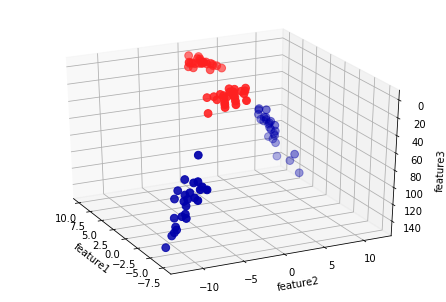

In [30]:
#add the 3rd dimension
X_new = np.hstack([X, X[:, 1:] ** 2])

#draw a 3d graphs of the dataset
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=26)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature3")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature2 ** 2')

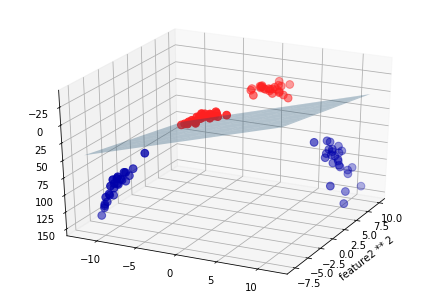

In [32]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#draw the decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, cmap=mglearn.cm2, s=60)
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("feature1")
ax.set_xlabel("feature2")
ax.set_xlabel("feature2 ** 2")

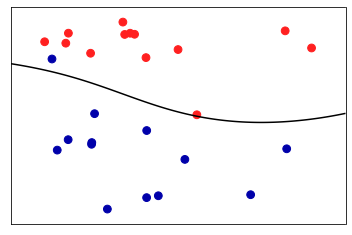

In [35]:
#generation d'un dataset
X, y = mglearn.tools.make_handcrafted_dataset()
#entrainement du SVM kernelized
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

#affichage du resultat
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=mglearn.cm2)
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=200,facecolors='none', zorder=10, linewidth=3)

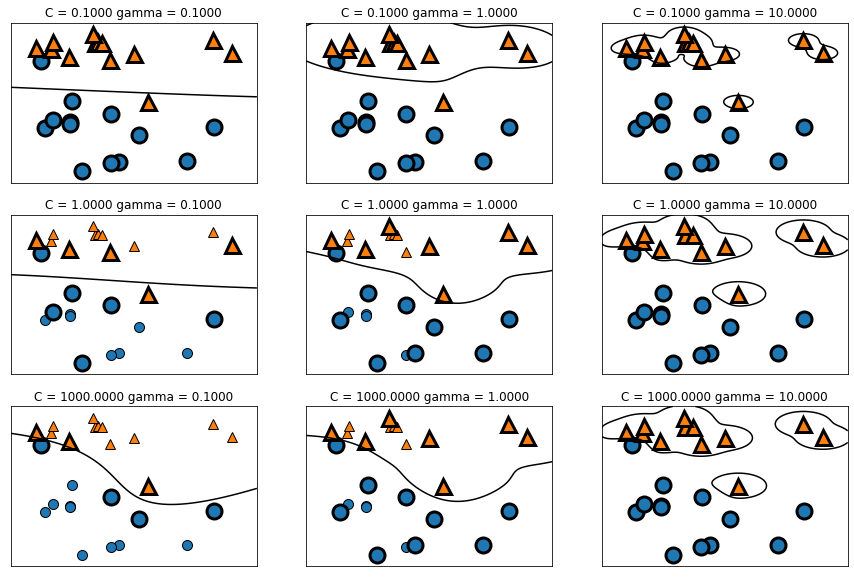

In [37]:
#tests de différents paramétrages sur le SVC
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

In [39]:
#Test du SVC avec le cancer dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC().fit(X_train, y_train)

print("accuracy on the training set: %s" % svc.score(X_train, y_train))
print("accuracy on the test set: %s" % svc.score(X_test, y_test))

accuracy on the training set: 1.0
accuracy on the test set: 0.6293706293706294


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Comme visible plus haut, le SVC overfit beaucoup. C'est dû aux données qui sont sur des échelles très différentes, comme on peut le voir plus bas. Les SVC ne performants bien que sur des données standardisées, il faudrait donc effectuer un fort preprocessing sur le dataset avant de le donner au modèle pour l'entrainement.

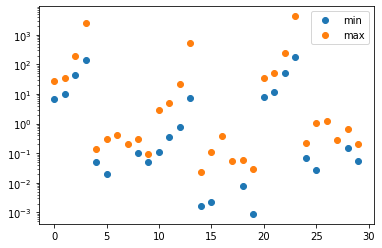

In [40]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), 'o', label="max")
plt.legend(loc="best")
plt.yscale("log")

In [41]:
#preprocessing du dataset d'entrainement
min_on_training = X_train.min(axis=0)
range_on_training = X_train.max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training

#preprocessing du dataset de test
min_on_test = X_test.min(axis=0)
range_on_test = X_test.max(axis=0)

X_test_scaled = (X_test - min_on_test) / range_on_test

In [48]:
#Test du SVC avec le cancer dataset apres preprocessing et ajustement de paramètre
svc = SVC(C=1000).fit(X_train_scaled, y_train)

print("accuracy on the training set: %s" % svc.score(X_train_scaled, y_train))
print("accuracy on the test set: %s" % svc.score(X_test_scaled, y_test))

accuracy on the training set: 0.9882629107981221
accuracy on the test set: 0.8321678321678322


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pros:
    - Peut fonctionner sur une grande variété de datasets
    - Permet des decision boundaries très complexes
    
Cons:
    - Devient très lent très rapidement avec l'augmentation de la taille des datasets
    - Peut prendre beaucoup de mémoire
    - Nécessite un preprocessing très précis
    

# Deep Learning

Yeee Haw. le deep learning est principalement l'utilisation de MLPs en apprentissage automatique. Les MLPs, soit un Multi-Layer Perceptron, est un ensemble de modèles, au même titre que les forêts aléatoires. Ils sont constitués de perceptron, des modèles de régression linéaire couplé à une fonciton de "passage" qui indique si un signaux sort du modèle ou non.

Un MLP est donc un ensemble de perceptrons, assemblé en couches de plusieurs perceptrons chacunes. Les inputs, ou features du sample, sont envoyé dans la première couche de perceptrons, qui envoient à leur tour leurs résultats dans la couche suivante, et ainsi de suite jusqu'aux sorties.

Il existe 2 fonction de passage populaire dans le deep learning, soit le 'relu' et le 'tanh':

Text(0.5, 1.0, 'activation_functions')

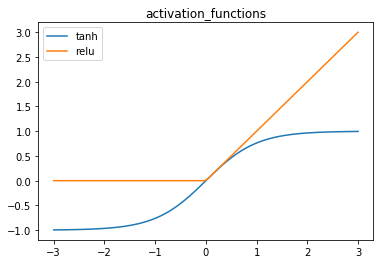

In [52]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")

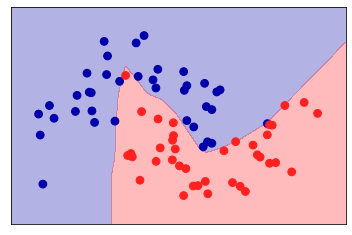

In [57]:
#test d'un MLP par defaut sur un dataset à deux lunes
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

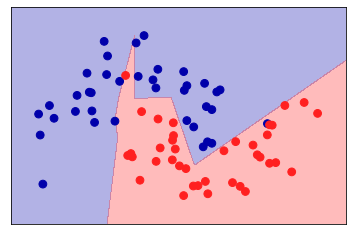

In [58]:
#reduction du nombre de perceptrons de 100(default) à 10
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

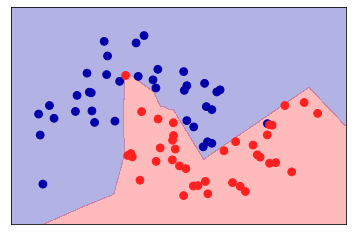

In [64]:
#test avec 2 couches caches de 10 neurones
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

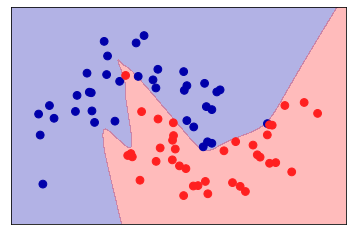

In [65]:
#utilisation du tanh a la place du relu
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

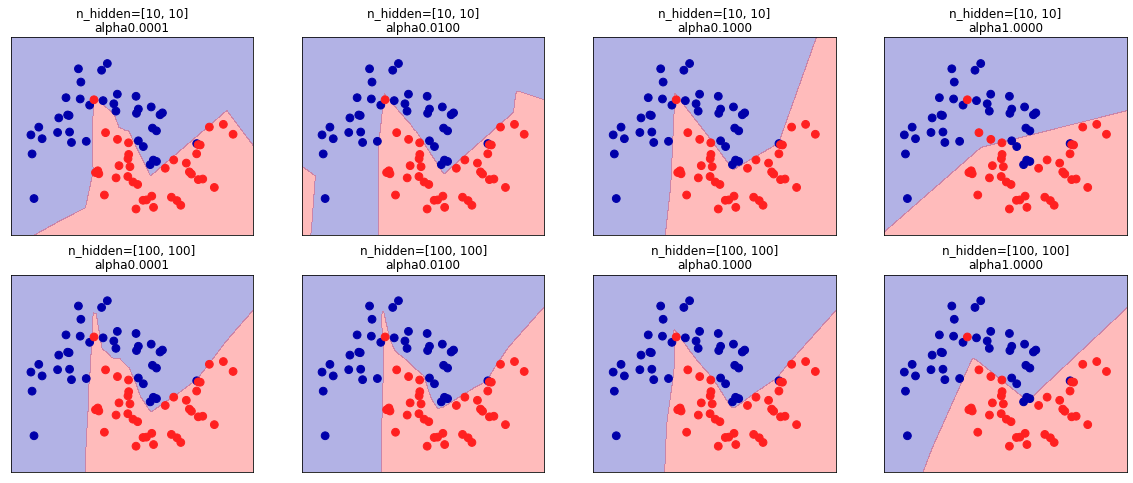

In [69]:
#test de differentes quantites de perceptrons avec des valeurs de penalites alpha
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        axx.set_title("n_hidden=[%d, %d]\nalpha%.4f" % (n_hidden_nodes, n_hidden_nodes, alpha))

Les MLPs sont aussi très puissant sur des datasets à dimension plus élevé, bien qu'ils requiert un ajustement des paramètres minucieux.

In [70]:
#Utilisation du MLP par defaut sur le cancer dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp.fit(X_train, y_train)

print("accuracy on the training set: %s" % mlp.score(X_train, y_train))
print("accuracy on the test set: %s" % mlp.score(X_test, y_test))

accuracy on the training set: 0.3873239436619718
accuracy on the test set: 0.3916083916083916


Le terrible résultat est dû, comme avec le SVC, au fait que les données ont besoin d'être preprocess avant d'être fourni au modèle. Par contre, contrairement au SVC dont les données doivent être redimensionnées entre 0 et 1, le MLP prend des valeurs entre -1 et 1.

In [72]:
#preprocessng
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)

print("accuracy on the training set: %s" % mlp.score(X_train_scaled, y_train))
print("accuracy on the test set: %s" % mlp.score(X_test_scaled, y_test))

accuracy on the training set: 0.9906103286384976
accuracy on the test set: 0.965034965034965


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [73]:
#limitation du nombre d'iterations lors de l'apprentissage du modele, limite l'overtfitting
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)

print("accuracy on the training set: %s" % mlp.score(X_train_scaled, y_train))
print("accuracy on the test set: %s" % mlp.score(X_test_scaled, y_test))

accuracy on the training set: 1.0
accuracy on the test set: 0.972027972027972


In [74]:
#augmentation du parametre alpha pour simplifier le modele
mlp = MLPClassifier(max_iter=1000, random_state=0, alpha=1).fit(X_train_scaled, y_train)

print("accuracy on the training set: %s" % mlp.score(X_train_scaled, y_train))
print("accuracy on the test set: %s" % mlp.score(X_test_scaled, y_test))

accuracy on the training set: 0.9882629107981221
accuracy on the test set: 0.972027972027972


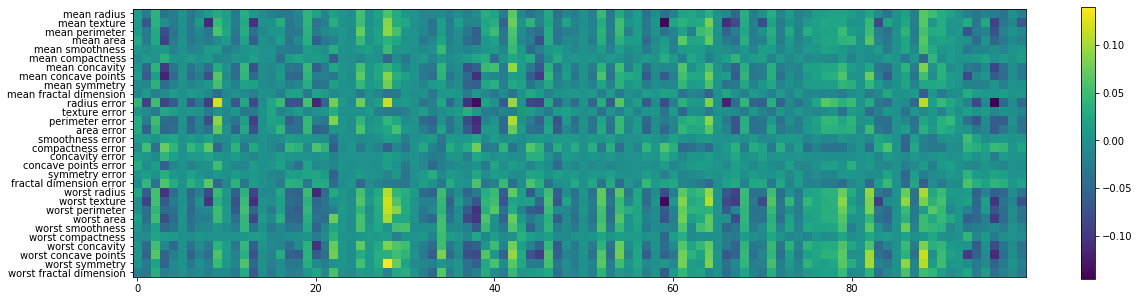

In [75]:
#representation des coefficients de chaque perceptron du modele
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()

Pros:
    - Peut apprendre des modèles très complexes
    - Extrêmement bon sur les datasets à très haute dimensions
    - Lorsque bien paramètré, le meilleur algorithme
    
Cons:
    - Très sensible au paramétrage
    - Nécessite du préprocessing
    - Très lent à entrainer

# Incertitude des prédictions

Les prédictions faites par les modèles ne sont jamais à 100% sûr. Ils existe des moyens de connaitres les différentes probabilités des prédictions.

In [86]:
#génération d'un ensemble avec un modèle de classification Gradient Boosting.
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

In [87]:
#affiche la preference d'une classe ou d'une autre du modele
#le domaine des valeurs est arbitraire et peut dependre des datasets
gbrt.decision_function(X_test)[:6]

array([ 4.13592629, -1.7016989 , -3.95106099, -3.62599351,  4.28986668,
        3.66166106])

In [88]:
#Il est possible de verifier que les valeurs correspondent bien aux preidictions
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


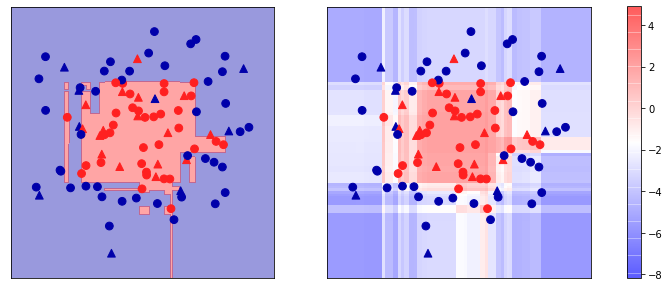

In [89]:
#affichage des niveaux de valeurs sur le domaine du dataset
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')

for ax in axes:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())

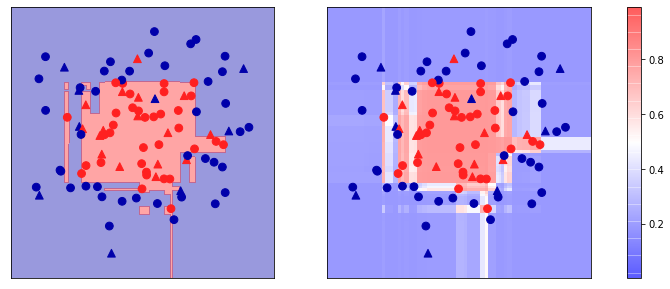

In [90]:
#predict_proba sort la probabilite de prediction de chaque classe pour chaque sample entre 0 et 1
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr', function='predict_proba')

for ax in axes:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())

Ces techniques de probabillités peuvent aussi être utilisés sur des modèles de classification multi-classes.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


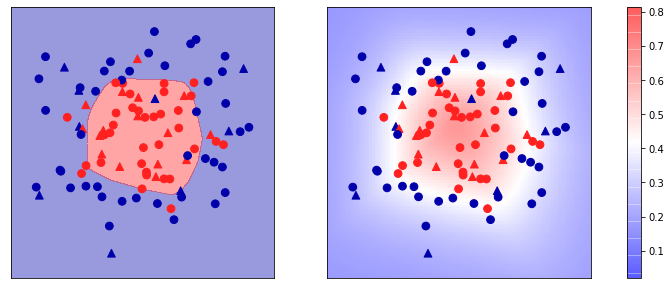

In [92]:
#affichage des probabilités avec un modèle MLP
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(mlp, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(mlp, X, ax=axes[1], alpha=.4, cm='bwr', function='predict_proba')

for ax in axes:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())